In [1]:
import os
import sys
from pathlib import Path
root_path = str(Path.cwd().parent)
src_path = os.path.join(root_path, "src")


if src_path not in sys.path:
    sys.path.append(src_path)



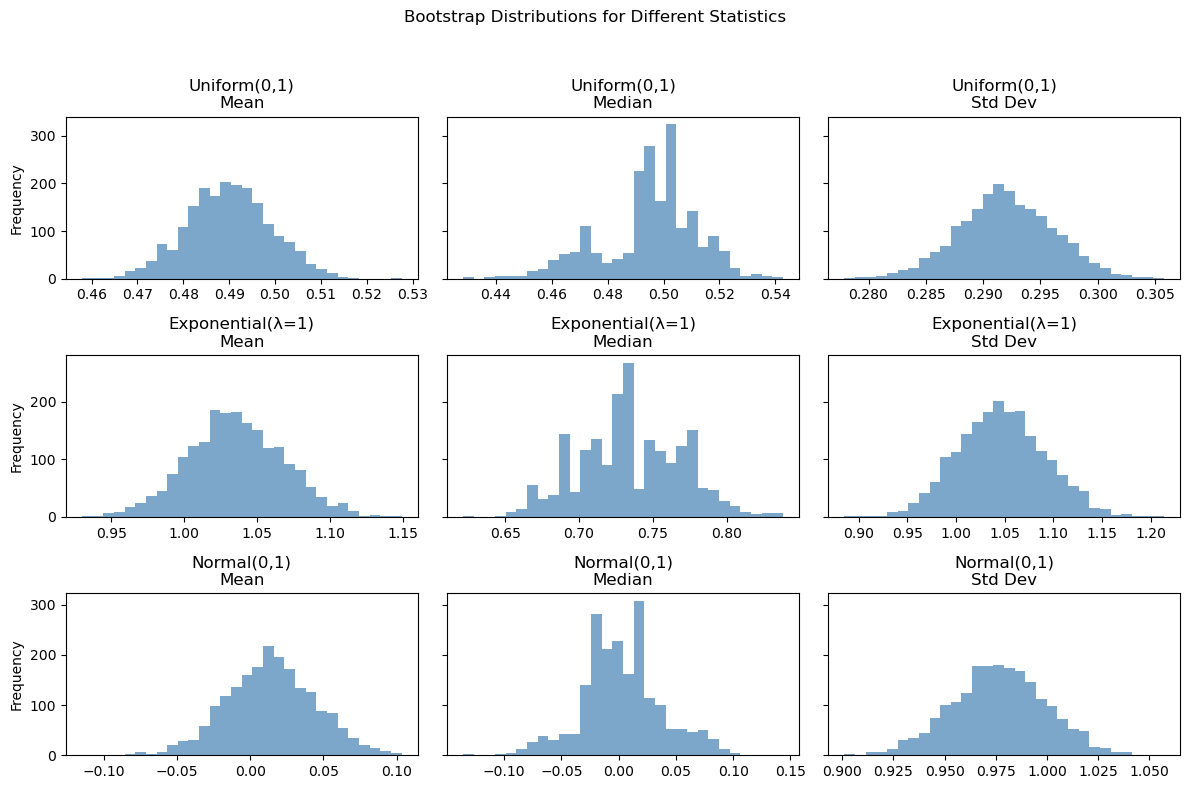

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def bootstrap_sampling(data, n_bootstraps, statistic_func):
    """
    Performs bootstrap sampling on 'data' and returns a list of 
    computed 'statistic_func' values for each bootstrap sample.
    """
    n = len(data)
    boot_stats = []
    for _ in range(n_bootstraps):
        # sample with replacement to create a bootstrap sample
        sample_indices = np.random.randint(0, n, n)
        sample = data[sample_indices]
        # compute the statistic for this sample
        boot_stats.append(statistic_func(sample))
    return np.array(boot_stats)


# ---------------------------------------------------
# 1) GENERATE EXAMPLE DATASETS
# ---------------------------------------------------
np.random.seed(42)      # for reproducibility

N = 1000                # size of original datasets
n_bootstraps = 2000     # number of bootstrap samples
bins = 30               # number of bins for histograms

# Different distributions:
data_uniform = np.random.uniform(0, 1, N)        # Uniform(0,1)
data_expo = np.random.exponential(scale=1.0, size=N)   # Exponential(λ=1)
data_norm = np.random.normal(loc=0, scale=1, size=N)    # Normal(0,1)

datasets = {
    "Uniform(0,1)": data_uniform,
    "Exponential(λ=1)": data_expo,
    "Normal(0,1)": data_norm
}

# ---------------------------------------------------
# 2) DEFINE STATISTICS TO BOOTSTRAP
# ---------------------------------------------------
def stat_mean(x):
    return np.mean(x)

def stat_median(x):
    return np.median(x)

def stat_std(x):
    return np.std(x, ddof=1)  # ddof=1 for sample std

statistics = {
    "Mean": stat_mean,
    "Median": stat_median,
    "Std Dev": stat_std
}

# ---------------------------------------------------
# 3) BOOTSTRAP AND PLOT
# ---------------------------------------------------
fig, axs = plt.subplots(len(datasets), len(statistics), 
                        figsize=(12, 8), sharey='row')
fig.suptitle("Bootstrap Distributions for Different Statistics")

for row_idx, (dist_name, data) in enumerate(datasets.items()):
    for col_idx, (stat_name, stat_func) in enumerate(statistics.items()):
        
        # 3A) Perform bootstrapping for this statistic
        boot_vals = bootstrap_sampling(data, n_bootstraps, stat_func)
        
        # 3B) Plot histogram
        ax = axs[row_idx, col_idx] if len(datasets) > 1 else axs[col_idx]
        ax.hist(boot_vals, bins=bins, color='steelblue', alpha=0.7)
        ax.set_title(f"{dist_name}\n{stat_name}")
        
        if col_idx == 0:
            ax.set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [8]:
queue="RANKED_SOLO_5x5"
tier="CHALLENGER"
division="I"
pages=1
url = f"https://euw1.api.riotgames.com/lol/league-exp/v4/entries/{queue}/{tier}/{division}?page={pages}"
url
request_header = {"X-Riot-Token": riot_api_key}

In [15]:
response = requests.get(url=url,headsers=request_header)

In [17]:
response.json()
response.status_code

200

In [2]:
import sys
for path in sys.path:
  if "site-packages" in path:
    print(path)

c:\Users\tpade\anaconda3\Lib\site-packages
c:\Users\tpade\anaconda3\Lib\site-packages\win32
c:\Users\tpade\anaconda3\Lib\site-packages\win32\lib
c:\Users\tpade\anaconda3\Lib\site-packages\Pythonwin


In [3]:
class bybiene(Exception):
    pass

class penis(bybiene):
    pass

class CustomError(penis):
    pass

class SubCustomError(CustomError):
    pass

try:
    raise SubCustomError("An error occurred")
# except bybiene:
#     print("Pagavai bybiene")
# except CustomError:
#     print("Caught CustomError")
except SubCustomError:
    print("Caught SubCustomError")


Caught SubCustomError


In [6]:

class MyClass:
    def show_self(self):
        print("In show_self, self is:", self)

instance = MyClass()
f = instance.show_self  # Getting the method from the instance
f()  # Calling the method through the variable

In show_self, self is: <__main__.MyClass object at 0x000001C703A18ED0>


In [7]:
instance.show_self()

In show_self, self is: <__main__.MyClass object at 0x000001C703A18ED0>


In [14]:
MyClass.show_self(MyClass)

Self is: <class '__main__.MyClass'>


In [12]:
class MyClass:
    def show_self(self):
        print("Self is:", self)

# Access the method directly from the class, not from an instance:
f = MyClass.show_self
# Try calling it without passing an instance:
try:
    f()
except TypeError as e:
    print("Error:", e)

Error: MyClass.show_self() missing 1 required positional argument: 'self'


In [32]:
class MyClass:
    def show_self(self):
        pass

instance = MyClass()
bound_method = instance.show_self

print("Type of bound_method:", type(bound_method))
print("Bound method __self__ attribute:", bound_method.__self__)

Type of bound_method: <class 'method'>
Bound method __self__ attribute: <__main__.MyClass object at 0x000001C70469E2D0>


In [13]:
class Person:
    def __init__(self, name):
        self.name = name
    
    def say_hello(self):
        print("Hello, my name is", self.name)

alice = Person("Alice")
bob = Person("Bob")

alice.say_hello()
bob.say_hello()


Hello, my name is Alice
Hello, my name is Bob


In [16]:
MyClass.__dict__

mappingproxy({'__module__': '__main__',
              'show_self': <function __main__.MyClass.show_self(self)>,
              '__dict__': <attribute '__dict__' of 'MyClass' objects>,
              '__weakref__': <attribute '__weakref__' of 'MyClass' objects>,
              '__doc__': None})

In [21]:
alice.__dict__
instance.__dict__
MyClass.__dict__

mappingproxy({'__module__': '__main__',
              'show_self': <function __main__.MyClass.show_self(self)>,
              '__dict__': <attribute '__dict__' of 'MyClass' objects>,
              '__weakref__': <attribute '__weakref__' of 'MyClass' objects>,
              '__doc__': None})

In [22]:
# Define a simple function outside of any class.
def greet(self):
    print("Hello from", self)

# Create a dummy class.
class Dummy:
    pass

# Create an instance of Dummy.
instance = Dummy()

# Manually bind the function 'greet' to the instance using the __get__ method.
bound_greet = greet.__get__(instance, Dummy)

# Now call the bound function without explicitly passing an argument.
bound_greet()


Hello from <__main__.Dummy object at 0x000001C7046F6050>


In [23]:
class MyDescriptor:
    def __get__(self, instance, owner):
        print(f"__get__ called with instance={instance} and owner={owner}")
        return "Value from descriptor"

class MyClass:
    attr = MyDescriptor()

# Create an instance of MyClass
instance = MyClass()

# Access the descriptor via the instance
print("Accessing via instance:", instance.attr)

# Access the descriptor via the class
print("Accessing via class:", MyClass.attr)


__get__ called with instance=<__main__.MyClass object at 0x000001C703F40B90> and owner=<class '__main__.MyClass'>
Accessing via instance: Value from descriptor
__get__ called with instance=None and owner=<class '__main__.MyClass'>
Accessing via class: Value from descriptor


In [63]:
# A simple function defined at the module level.
def hello(name):
    print(f"Hello, {name}!")

# You can call it normally:
hello("Alice")

# Now, let's inspect the __get__ method of this function:
print("Does 'hello' have a __get__? ->", hasattr(hello, "__get__"))

# What happens if you manually call __get__?
# For example, let's simulate binding it to an object.
class Dummy:
    pass

dummy_instance = Dummy()
bound_hello = hello.__get__(dummy_instance, Dummy)

# Now, what does bound_hello look like?
print("bound_hello:", bound_hello)
# If you call it, you still need to provide the extra argument, because our hello expects one parameter:
# bound_hello("World")

bound_hello.__self__
bound_hello.__func__



Hello, Alice!
Does 'hello' have a __get__? -> True
bound_hello: <bound method hello of <__main__.Dummy object at 0x000001C7046F5DD0>>


<function __main__.hello(name)>

In [11]:
try:
  raise Exception("pusk")

except Exception as e:
    print(e)
    raise e


print("Sustabdyk...")

pusk


Exception: pusk

In [ ]:
class penis:
  def okokok(self, x=2):
    print("nu ok",x)


obj = penis()

# func = obj.__class__.__dict__['okokok'](obj)
# func(3)



obj.__class__.__dict__['okokok']
      

<function __main__.penis.okokok(self, x=2)>

In [30]:
class Penis:
    def okokok(self):
        print("ok")

obj = Penis()
func = obj.okokok  # Internally calls __get__

print(func)  # Inspect the returned object
print(type(func))


print(func.__func__)   # The original function
print(func.__self__)   # The instance it's bound to
print(func.__class__)  # The type ('method')


<bound method Penis.okokok of <__main__.Penis object at 0x000002AC830F55D0>>
<class 'method'>
<function Penis.okokok at 0x000002AC831C07C0>
<class 'method'>


In [ ]:
def add(a, b):
    return a + b

def function_wrap(func):
    multiplier = 2  # New variable
    def wrapper(x, y):
        print(f"Calling {func.__name__} with {x}, {y}")
        return func(x, y) * multiplier  # Uses multiplier
    return wrapper

wrapped_add = function_wrap(add)

print(wrapped_add.__closure__[0].cell_contents)  # <function add at 0x...>
print(wrapped_add.__closure__[1].cell_contents)  # 2 (multiplier)



<function add at 0x000002AC831B6DE0>
2


(<cell at 0x000002AC824D6BC0: function object at 0x000002AC831B6DE0>,
 <cell at 0x000002AC824D6E30: int object at 0x00007FF90FFD9348>)

In [50]:
def letswrap(function, address):
  def wrapper(food):
    return function(address,food)
  
  return wrapper


def address(address, food):
  print(f"{address} {food}")


address_ = letswrap(address, "bet koks adresas vps")

address_.__closure__

address_("Pizza")

bet koks adresas vps Pizza


In [ ]:
def delivery_wrapper(func, address):  
    def wrapper(food):  # ✅ No need to pass address anymore
        print(f"Using stored address: {address}")
        return func(address, food)  # ✅ Automatically includes address
    return wrapper

def food_delivery(address, food):
  print(f"{address} {food}")

  
# Create a delivery service for "123 Main St"
fast_delivery = delivery_wrapper(food_delivery, "123 Main St")

# Now we only provide the food, not the address
fast_delivery("Pizza")  # ✅ Works, auto-includes the address


Using stored address: 123 Main St
123 Main St Pizza


In [4]:
dic =[{
        "leagueId": "79b329f5-cc98-3716-95f4-463e7e6e80a0",
        "queueType": "RANKED_SOLO_5x5",
        "tier": "CHALLENGER",
        "rank": "I",
        "summonerId": "w2veNyMqgSJaNQHr_jM5WDzRDv1FIVLtEpsWIg_WclzVwbmW",
        "puuid": "pUVbqeDKLY6Vwi0BgM3_y8guzVUMrMM6_eNmpWnTXiXaO3FB41ecQwzJzVSrtdlIPi12wjgMIN78-Q",
        "leaguePoints": 1887,
        "wins": 165,
        "losses": 116,
        "veteran": True,
        "inactive": False,
        "freshBlood": False,
        "hotStreak": False
    },
    {
        "leagueId": "79b329f5-cc98-3716-95f4-463e7e6e80a0",
        "queueType": "RANKED_SOLO_5x5",
        "tier": "CHALLENGER",
        "rank": "I",
        "summonerId": "mbwYmSWi_LAPflUJxO3ffTOeGHpfixpcevVuL7pr5m20iaA__j_U-6eoLA",
        "puuid": "DCakA0-rcS_yK4_71beLHzd2lHFG-lXsCSwxkaCU1QL4p-3KaJiWAGo7ZRG7uZhe1RmZh-xJsg2Lsg",
        "leaguePoints": 1872,
        "wins": 211,
        "losses": 161,
        "veteran": True,
        "inactive": False,
        "freshBlood": False,
        "hotStreak": False
    }
]


dic[0]

{'leagueId': '79b329f5-cc98-3716-95f4-463e7e6e80a0',
 'queueType': 'RANKED_SOLO_5x5',
 'tier': 'CHALLENGER',
 'rank': 'I',
 'summonerId': 'w2veNyMqgSJaNQHr_jM5WDzRDv1FIVLtEpsWIg_WclzVwbmW',
 'puuid': 'pUVbqeDKLY6Vwi0BgM3_y8guzVUMrMM6_eNmpWnTXiXaO3FB41ecQwzJzVSrtdlIPi12wjgMIN78-Q',
 'leaguePoints': 1887,
 'wins': 165,
 'losses': 116,
 'veteran': True,
 'inactive': False,
 'freshBlood': False,
 'hotStreak': False}

In [5]:
import datetime

str(datetime.datetime.now().date())

'2025-03-26'

In [7]:
from pathlib import Path
import sqlite3

path_to_db = "D:/LoL Analysis Project/data/riot_data_database.db"
path_to_db

abs_path = Path(path_to_db)
abs_path


with sqlite3.connect(abs_path) as connection:
  cursor = connection.cursor()

  fetch_query = '''
        DROP TABLE IF EXISTS Match_Data_Participants_Table'''
  
  data = cursor.execute(fetch_query)
  connection.commit()




